In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import Derivative, symbols
%matplotlib inline

In [2]:
# input data
X=[0,1,1,2]
Y=[0,1,2,1]

In [3]:
#구하고자 하는 가중치 바이어스를 문자로 변경
W2=symbols('W2')
W1=symbols('W1')
W0=symbols('W0')

In [4]:
#loss function 계산함수
def lossfuntion(x,y):
    e=0
    for i in range(len(x)):
        a=x[i]
        b=y[i]
        c=W2*a**2+W1*a+W0
        d=(b-c)**2
        e=e+d
        print(e)
    return e

In [5]:
MSE=lossfuntion(X,Y)

W0**2
W0**2 + (-W0 - W1 - W2 + 1)**2
W0**2 + (-W0 - W1 - W2 + 1)**2 + (-W0 - W1 - W2 + 2)**2
W0**2 + (-W0 - 2*W1 - 4*W2 + 1)**2 + (-W0 - W1 - W2 + 1)**2 + (-W0 - W1 - W2 + 2)**2


In [6]:
#Lossfunction 을 각 변수별 편미분 수행
MSE_W2 = Derivative(MSE,W2).doit()
MSE_W1 = Derivative(MSE,W1).doit()
MSE_W0 = Derivative(MSE,W0).doit()

print(MSE_W2)
print(MSE_W1)
print(MSE_W0)

12*W0 + 20*W1 + 36*W2 - 14
8*W0 + 12*W1 + 20*W2 - 10
8*W0 + 8*W1 + 12*W2 - 8


In [7]:
# 행렬을 이용한 연립 방정식 풀기
A=np.array([[12,20,36],[8,12,20],[8,8,12]])
B=np.array([14,10,8])
# A 의 역행열
C=np.linalg.inv(A)
# D 각 W 값의 행렬
D=np.dot(C,B)

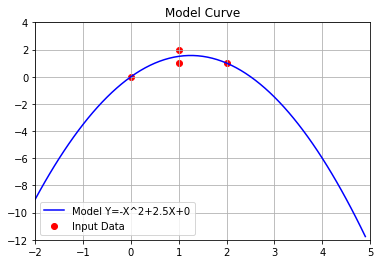

In [12]:
# 그래프로 시각화 하기
x=np.arange(-2,5,0.1)
y=D[2]*x**2+D[1]*x+D[0]
plt.scatter(X,Y,c="red",label = 'Input Data')
plt.plot(x,y,c="blue",label='Model Y=-X^2+2.5X+0')
plt.xlim(-2,5)
plt.ylim(-12,4)
plt.legend()
plt.grid(True)
plt.title('Model Curve')
plt.savefig('Model Curve', dpi=300)
plt.show()

In [11]:
# W 값
print('W2=',round(D[2],4))
print('W1=',round(D[1],4))
print('W0=',round(D[0],4))

W2= -1.0
W1= 2.5
W0= 0.0
